# Pymaceuticals Inc.
---

### Analysis

- Upon mice, a study was conducted with various medications to ultimately test its impact on tumor volume.Tumor Volume is the amount of space a tumor takes up in its given area. Out of the medications tested, Ramicane has shown to have the least average of tumor volume (mm3) in comparrison to the other drugs listed. Whereas,Katapril has shown to have the greates average in tumor volume (mm3).  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df= pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Mice_count= len(combined_data_df)
Mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_table= combined_data_df.pivot_table(index=["Mouse ID", "Timepoint"], aggfunc="size")
print(dup_mice_table)


Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Length: 1888, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df= combined_data_df.drop_duplicates(["Mouse ID"])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count= len(clean_data_df)
clean_mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
avg_TVmm3=combined_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
med_TVmm3= combined_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_TVmm3=combined_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
SD_TVmm3=combined_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM_TVmm3=combined_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
pd.DataFrame([avg_TVmm3, med_TVmm3, var_TVmm3, SD_TVmm3, SEM_TVmm3])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Tumor Volume (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Tumor Volume (mm3),24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
Tumor Volume (mm3),4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
Tumor Volume (mm3),0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
combined_data_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
    
})
# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

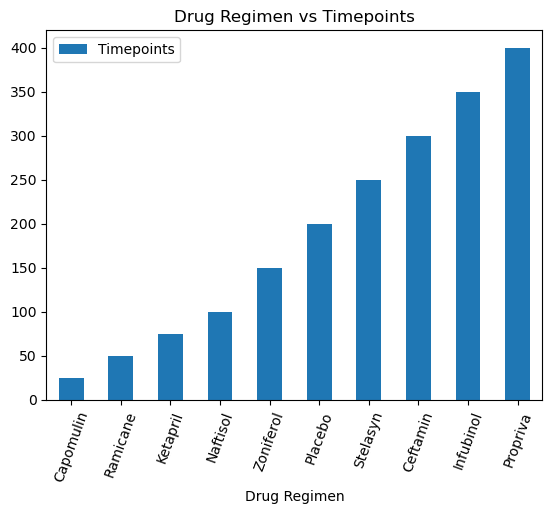

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data = {"Drug Regimen":["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"],

        "Timepoints":[25, 50, 75, 100,150, 200, 250, 300, 350, 400]

        };

dataFrame = pd.DataFrame(data=data);
dataFrame.plot.bar(x="Drug Regimen", y="Timepoints", rot=70, title="Drug Regimen vs Timepoints");



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

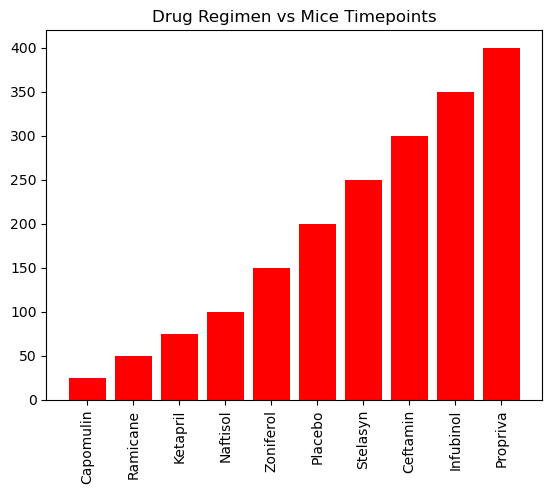

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
users=[25, 50, 75, 100,150, 200, 250, 300, 350, 400]
plt.bar(["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"], users, color= "r", alpha=1)
plt.title("Drug Regimen vs Mice Timepoints")
plt.xticks(rotation='vertical')

([<matplotlib.patches.Wedge at 0x163a9cd5dc0>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'female'),
  Text(0.7123680187966355, 0.8381717042442776, 'male')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

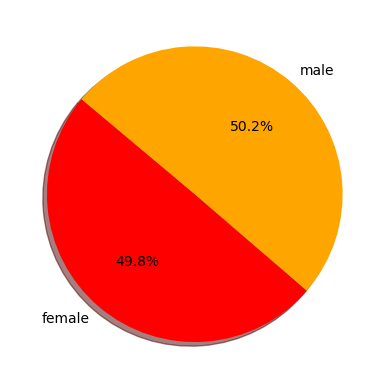

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["female", "male"]
sizes = [124, 125]
colors = ["red", "orange"]
plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

<AxesSubplot:ylabel='Mouse ID'>

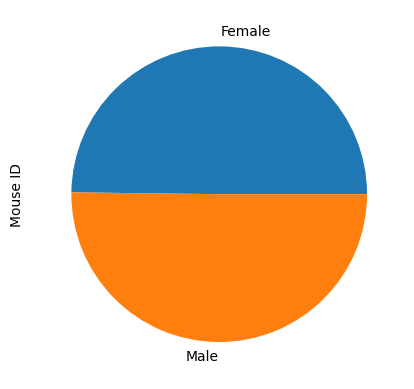

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count_df= clean_data_df.groupby("Sex")
sex_count_df.count()["Mouse ID"].plot(kind="pie")

In [13]:
sex_count_df= clean_data_df.groupby("Sex")
sex_count_df.count()["Mouse ID"]

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,0,Capomulin,Female,9,22,45.0,0
1,b742,0,Capomulin,Male,7,21,45.0,0
2,f966,0,Capomulin,Male,16,17,45.0,0
3,g288,0,Capomulin,Male,3,19,45.0,0
4,g316,0,Capomulin,Female,22,22,45.0,0


In [20]:
# Start by getting the last (greatest) timepoint for each mouse (capom...cont)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 45.0
The upper quartile of Capomulin tumors: 45.0
The interquartile range of Capomulin tumors: 0.0
The median of Capomulin tumors: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [23]:
# Start by getting the last (greatest) timepoint for each mouse_rami
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,0,Ramicane,Male,3,22,45.0,0
1,a444,0,Ramicane,Female,10,25,45.0,0
2,a520,0,Ramicane,Male,13,21,45.0,0
3,a644,0,Ramicane,Female,7,17,45.0,0
4,c458,0,Ramicane,Female,23,20,45.0,0


In [26]:
# Start by getting the last (greatest) timepoint for each mouse_rami...cont
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 45.0
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 0.0
The median of Ramicane tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [28]:
# Start by getting the last (greatest) timepoint for each mouse_infub
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
2,a577,0,Infubinol,Female,6,25,45.0,0
3,a685,0,Infubinol,Male,8,30,45.0,0
4,c139,0,Infubinol,Male,11,28,45.0,0


In [30]:
# Start by getting the last (greatest) timepoint for each mouse_infub...cont
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 45.0
The upper quartile of Infubinol tumors is: 45.0
The interquartile range of Infubinol tumors is: 0.0
The median of Infubinol tumors is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [32]:
# Start by getting the last (greatest) timepoint for each mouse_ceft
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,0,Ceftamin,Female,20,28,45.0,0
1,b447,0,Ceftamin,Male,2,30,45.0,0
2,b487,0,Ceftamin,Female,6,28,45.0,0
3,b759,0,Ceftamin,Female,12,25,45.0,0
4,f436,0,Ceftamin,Female,3,25,45.0,0


In [33]:
# Start by getting the last (greatest) timepoint for each mouse_ceft...cont
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 45.0
The upper quartile of temperatures is: 45.0
The interquartile range of temperatures is: 0.0
The the median of temperatures is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data_df[combined_data_df["Drug Regimen"].isin(drug_list)]
drugs.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

    
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
    

Capomulin
Ramicane
Infubinol
Ceftamin
------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
-------

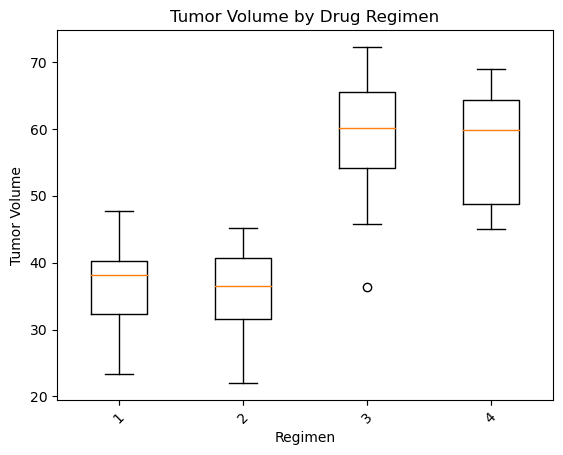

In [51]:


boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()
    



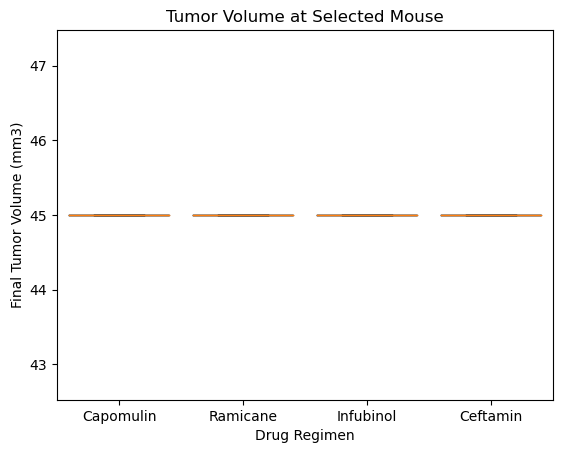

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.8, vert=True)
plt.show()

## Line and Scatter Plots

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "x401",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0


Text(0, 0.5, 'Tumor Volume (mm3)')

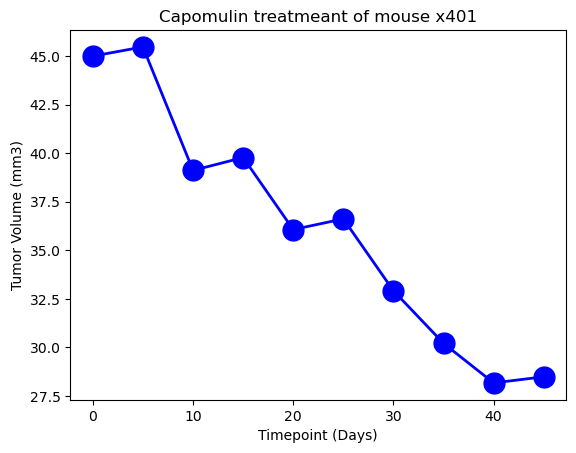

In [67]:
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse x401')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

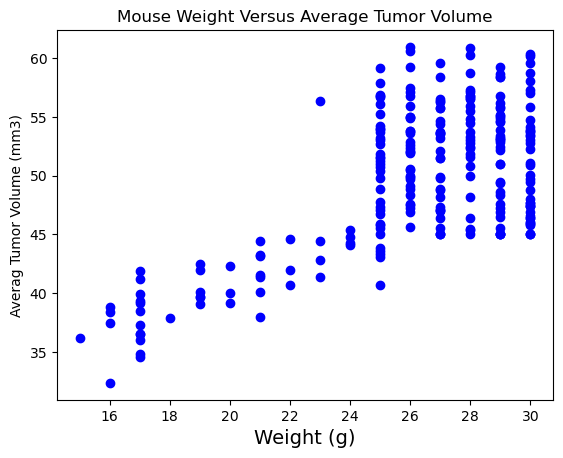

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =combined_data_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.66


In [77]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values =avg_capm_vol["Weight (g)"]* slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

NameError: name 'linregress' is not defined